             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
(27, 9)
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object
Частка пропусків у колонцях:
Регіон    0.000000
1950      0.074074
1960      0.037037
1970      0.037037
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.074074
2019      0.148148
dtype: float64
               Регіон    1950       1960  1970  1990  2000  2012    2014  \
0                Крим  23.000  20.600000  16.0  13.0   7.3  12.6  11.144   
1           Вінницька  22.400  19.200000 

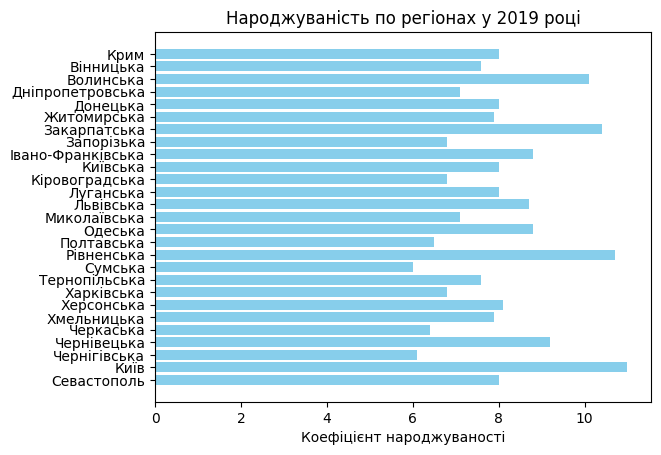

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

match = 'Коефіцієнт народжуваності в регіонах України'
info = pd.read_html('https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8',
                    thousands="",
                    decimal=",",
                    match=match)

# Заміна значень "—" на NaN у всіх таблицях DataFrame
cleaned_dfs = [df.replace("—", pd.NA) for df in info]

# Об'єднання всіх таблиць у один DataFrame
combined_df = pd.concat(cleaned_dfs)

# Заміна типів нечислових колонок на числові
for col in combined_df.columns:
    if pd.api.types.is_object_dtype(combined_df[col]):
        try:
            combined_df[col] = pd.to_numeric(combined_df[col])
        except ValueError:
            pass  # Якщо не вдається змінити тип, пропускаємо

# Видалення останнього рядка
combined_df.drop(combined_df.index[-1], inplace=True)

print(combined_df.head())
print(combined_df.shape)
print(combined_df.dtypes)

# Визначення частки пропусків у кожній колонці
missing_values = combined_df.isnull().sum()
total_values = len(combined_df)
missing_ratio = missing_values / total_values
print("Частка пропусків у колонцях:")
print(missing_ratio)

# Заміна відсутніх даних середніми значеннями по стовпцях, крім першого
filled_df = combined_df.copy()
filled_df.iloc[:, 1:] = filled_df.iloc[:, 1:].fillna(filled_df.iloc[:, 1:].mean())
print(filled_df)

# Обчислення середніх значень для кожного стовпця (крім першого з назвами областей)
avg_values = filled_df.iloc[:, 1:].mean()

# Отримання значення середньої народжуваності в 2019 році по Україні
avg_birth_rate_2019 = avg_values["2019"]

# Отримання списку регіонів з вищим за середній рівнем народжуваності у 2019 році
regions_above_avg = filled_df[filled_df["2019"] > avg_birth_rate_2019]["Регіон"].tolist()

print(regions_above_avg)

# Знаходження регіону з найвищим рівнем народжуваності у 2014 році
highest_birth_rate_2014_region = filled_df["2014"].idxmax()
region_name = filled_df.loc[highest_birth_rate_2014_region, 'Регіон']
print("Регіон з найвищим рівнем народжуваності у 2014 році:", region_name)

regions = filled_df['Регіон']
birth_rate_2019 = filled_df['2019']

# Побудова стовпчикової діаграми
plt.barh(regions, birth_rate_2019, color='skyblue')
plt.xlabel('Коефіцієнт народжуваності')
plt.title('Народжуваність по регіонах у 2019 році')
plt.gca().invert_yaxis()  # Реверсія осі Y, щоб регіони були в порядку зростання від верху до низу

plt.savefig("birth_rate_2019_plot.png")
